#Stock Exchange Week 2
After studying a little on how to visually read the stock graphs and their candles and such I was able to pick out some interesting and potentially good buys (LOGI, SE, SONY, and TTWO). They were all found in my research on interesting stocks that appear in the gaming industry.
What I found visually about each one.

**LOGI**: logitech
  - below 200MA
  - Area of Value
  - Entry Trigger: Bullish
  - Volume is up

**SE**: sea limited
  - above 200MA
  - Area of Value
  - Entry Trigger: hammer
  - Declining Volume
  
**SONY**: sony (best to do yesterday)
  - above 200MA
  - Area of Value
  - Entry Trigger: Hammer
  - Declining Volume

**TTWO**: take-two interactive
  - below 200MA
  - Bullish Engulfing
  - Area of Value
  - Declining Volume 


These observations kind of left me at an impass, these all had there attributes telling me to buy but also there cons telling me not to. So, I obviously needed more information. Using Yahoo Finance I gathered up some more information to help make my 3 trade decisions for this week.


In [ ]:
!pip install yfinance

Firstly, I started compiling together a big list object of lists holding all the possible info yfinance would give me about these 4 different stocks.

In [61]:
import yfinance as yf

tickerStrings = ['LOGI', 'SE', 'SONY', 'TTWO']

df_list = list()
for ticker in tickerStrings:
    temp = yf.Ticker(ticker)
    data = temp.info
    data['ticker'] = ticker
    df_list.append(data)

Then using the info list i filtered it only grabbing some data I thought would be the most impactful to my decision. 
- **Beta**: this value is based on the S&P 500 and rates how volatile it is
  - higher than 1 is typically more volatile/risky
- **FCF**: looking at the free cash flow helps see if this company is risky or not
  - if its a negative value they are dealing with more debts then revenues
- **RecommendationKey and Mean**: these values were very nice tie breakers as they are just a simple recommendation of buy or sell, with the mean being a value between 1-5 where 1 is buy and 5 is sell.
- **Volume**: though volume was included it ended up being more useful to look at the volume occilator on Investopedia as it would be a better tell of the current markets momentum
- **Ask and the 200MA**: I used these values to have a simple measure of whether the current asking price of above the 200MA as this is typically a sign of a positive trend (though looking at the graph affirms this)
- **Book Value & Current Ratio**: is just a measure of the (total assets - total liabilites), I used gauge the riskiness of the company as a lower value would mean they have more liabilites (though this may require more research as to whether this is actually a bad thing). Current Ratio is also a measure of risk as it is the (Total Assets/Total Liabilities)
- **Current Price**: This was also a little side value to compare to the current ask and hopefully gleam what the markets intentions are beyond what can be seen on the graph

In [ ]:
data = list()

for i, page in enumerate(df_list):
  d = list()
  d.append(page['ticker'])
  d.append(page['beta'])
  d.append(page['freeCashflow'])
  d.append(page['recommendationKey'])
  d.append(page['volume'])
  d.append(page['twoHundredDayAverage'])
  d.append(page['ask'])
  d.append(page['bookValue'])
  d.append(page['currentRatio'])
  d.append(page['currentPrice'])
  d.append(page['recommendationMean'])
  data.append(d)

print(data)

Finally, this was printed into a CSV document so i could take a closer, more personal look.

In [82]:
details = ['ticker', 'beta', 'freeCashflow', 'recommendationKey', 'volume', 'twoHundredDayAverage', 'ask', 'bookValue', 'currentRatio', 'currentPrice', 'recommendationMean']
with open('mycsvfile.csv','w') as f:
    w = csv.writer(f)
    w.writerow(details)
    w.writerows(data)

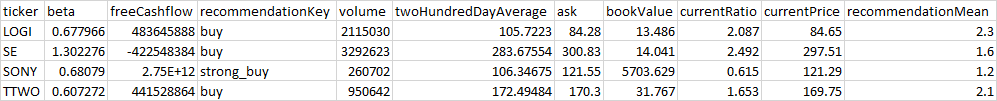

This was the resulting table generated from the yfinance pulls, though small it was used to help me come to my decision of what stocks I would be trading. 

To make this even easier I added a new column to the table called the `decision factor`. This factor was a culmination of data in the table and my minimal understanding of there meaning and about stock trading but none-the-less...

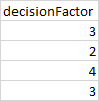

The decision factor portion was generated from the beta, FCF, ask, 200MA, & bookVal values. They were all just cumulative if-then values based on my current understanding of there meaning (as I guarentee can be improved)

###Decision Factor:
**Beta**: If beta is greater or equal to 1: add 1
- This is because it presumably means it is less risky or fluxuates about the market like normal

**FCF**: If FCF if greater than 0: add 1
- This is being used as a measure of risk to see how much they may be in debts, hence the positive telling us its safer

**(ask - 200MA)**: If this difference is greater than 0: add 1
- This difference would typically dictate that the current trend of this stock is a positive one as its currently above this average

**bookVal**: If this is greater than 1: add 1
- This is used similarly to the FCF value where if its over 1 than the its safer to get than one thats below 0.

This, together with the observations helped me decide which stocks to invest in by giving them a rank, the higher the number the higher priority to invest is.

The ranking ended as such:
- **SONY**: 7
- **LOGI**: 6
- **SE**: 5
- **TTWO**: 5

Well crap, now I have to some how break the tie between SE and TTWO. luckily this is where the currentRatio value comes in handy as the lower it is the higher the recommendation to buy there is. With SE @ 1.6 and TTWO @ 2.1 the choice was clear. The line up for my 3 trades is SONY, LOGI, and SE.

Great! Well now I actually have to do it...
Luckily this is made a little easier with some simple risk assesment and some calculations (specifically a position sizing calculator)

###Posiition Sizing Calculator:
|Capital|Risk|Buyprice|Stop Loss Val|Risk Dollars|# of Shares|Ticker|
|-|-|-|-|-|-|-|
|250000|0.8%|122|120|2000|1000|SONY|
| | |85|83|2000|1000|LOGI|
| | |297|280|2000|118|SE|


Followed some info I learned in my research and created my own calculator to get an idea of how many shares I should purchase to keep risk at a minimum as this is still in a very experimental phase.

So, working with a risk of 0.8% and some ideas of a buy price and some stop loss values (even though the simulator doesnt let us by stop loss shares...) I can gleam an idea of how much to buy of each.

Though I'm really never satisfied so I compared with my peers as to how much the poeple leading the class are purchasing and ended up halving these numbers as it felt safer (even though therer really isnt any risk here as its all just fake money).

###Wrapping this up:
In the end (regardless of outcome) I tried my best to apply not only what I had learned in my research of stock trading but also utilized a bit of data analysis to help firm up the decisions and minimize risk (hopefully)